In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Получаем текущую директорию (scripts/run/)
current_dir = os.getcwd()
print(f"Текущая директория: {current_dir}")

# Поднимаемся на 2 уровня вверх: run/ -> scripts/ -> v13_manual/ -> src/
src_path = os.path.join(current_dir, '..', '..', 'src')
src_path = os.path.abspath(src_path)  # Получаем абсолютный путь
print(f"Путь к src: {src_path}")

# Проверяем, существует ли папка
print(f"Папка src существует: {os.path.exists(src_path)}")
print(f"Папка logic существует: {os.path.exists(os.path.join(src_path, 'logic'))}")

sys.path.append(src_path)

# Теперь импортируем из logic
from logic.pendulum import PendulumSystem

Текущая директория: c:\GitHub\diplom\spores\v13_manual\scripts\run
Путь к src: c:\GitHub\diplom\spores\v13_manual\src
Папка src существует: True
Папка logic существует: True


In [70]:
pendulum = PendulumSystem(damping=0.0)

In [102]:
init_state = np.array([np.radians(15), 0])
control = 0
dt = 0.1
sim_time = 20

In [103]:
step_num = int(sim_time / dt)

In [104]:
nonlin_states = np.zeros((step_num + 1, 2))
nonlin_states[0] = init_state

current_state_nonlin = init_state.copy()

# Выполняем симуляцию
for i in range(step_num):
    current_state_nonlin = pendulum.scipy_rk45_step(current_state_nonlin, control, dt)
    
    # Сохраняем новое состояние
    nonlin_states[i+1] = current_state_nonlin

# --- 3. Визуализация результатов ---

time_vector = np.linspace(0, sim_time, step_num + 1)

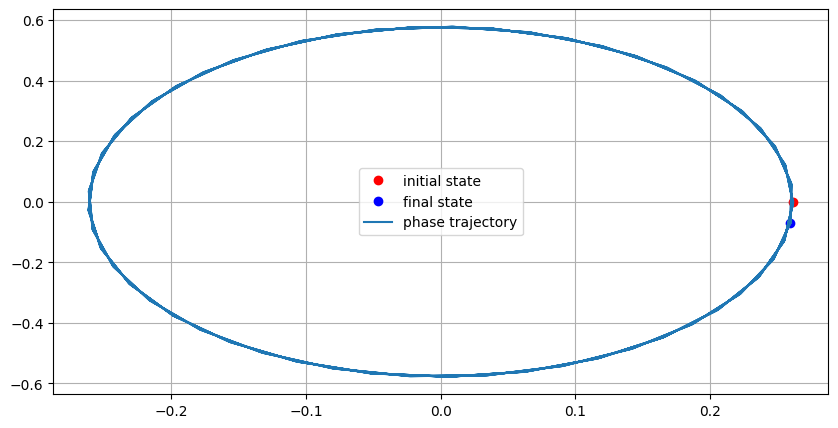

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(nonlin_states[0, 0], nonlin_states[0, 1], 'ro', label='initial state')
plt.plot(nonlin_states[-1, 0], nonlin_states[-1, 1], 'bo', label='final state')
plt.plot(nonlin_states[:, 0], nonlin_states[:, 1], label='phase trajectory')
plt.legend()
plt.grid()
plt.show()

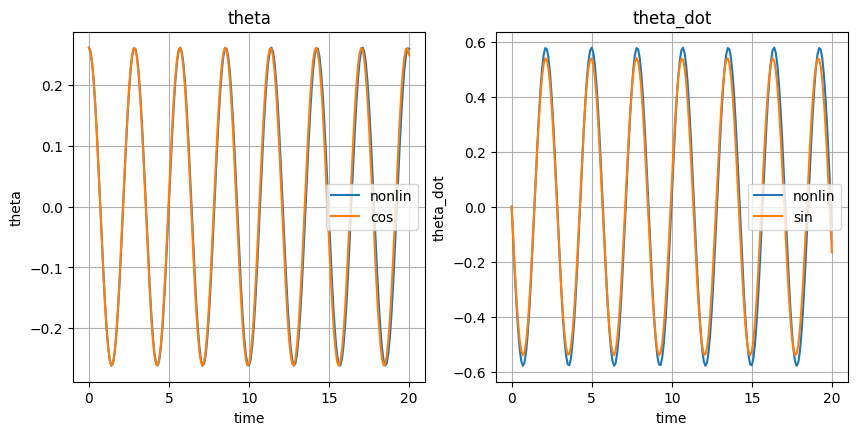

In [108]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('theta')
plt.xlabel('time')
plt.ylabel('theta')
plt.plot(time_vector, nonlin_states[:, 0], label='nonlin')
plt.plot(time_vector, init_state[0] * np.cos(np.sqrt(pendulum.g / pendulum.l) * time_vector), label='cos')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.title('theta_dot')
plt.xlabel('time')
plt.ylabel('theta_dot')
plt.plot(time_vector, nonlin_states[:, 1], label='nonlin')
plt.plot(time_vector, -0.54 * np.sin(np.sqrt(pendulum.g / pendulum.l) * time_vector), label='sin')
plt.legend()
plt.grid()
